# Testing bias

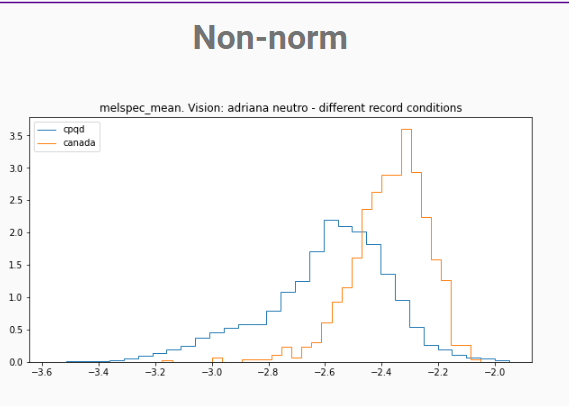

Vamos colocar um bias que resulte em uma alteração de +- 0.5 na média de valores de melspec

In [11]:
import pandas as pd
import librosa
import IPython.display as ipd

df = pd.read_csv('mp_styles_train.csv', sep=';')

In [12]:
df.head(3)

,phonetic_transcription,wav_path,speaker,style
0,#p kk uu uw ts ii vv 'aa rr un bb uu zz 'ee ij...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado
1,#p bb uu rr 'aa kk uc nn ac 'aa rf vv oo rr ic...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor
2,#p aa kk rd ee dz 'ii tt uc kk ic ss 'ee zh ac...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado


In [13]:
print(df['phonetic_transcription'].values[0])
ipd.Audio(df['wav_path'].values[0])

#p kk uu uw ts ii vv 'aa rr un bb uu zz 'ee ij rr uc zz nn uc ll 'eh ss ts ic 'eh ac 'uu nn ic kk ac kk 'oo ij zz ac vv 'aa ll ic dd ac #p


# Testing melspec values change bias

In [14]:
import sys
sys.path.insert(1, '/workspace/coqui-tts')
from TTS.utils.audio import AudioProcessor
from TTS.config import check_config_and_model_args, get_from_config_or_model_args, load_config, register_config
import pandas as pd
import librosa
import IPython.display as ipd
import numpy as np

In [15]:
%%capture
config = load_config('../../experiments/re_fastpitch_120pitch/config.json')
ap = AudioProcessor(**config.audio)

In [16]:
n = -100
y, sr = librosa.load(df['wav_path'].values[n])
ipd.Audio(y, rate=sr)

In [17]:
np.mean(ap.melspectrogram(y))

-2.48495

In [18]:
np.mean(ap.melspectrogram(y*5))

-1.785983

In [19]:
y, sr = librosa.load(df['wav_path'].values[n])
ipd.Audio(y*5, rate=sr)

# Generating biased wavs

temos 1244 arquivos da adriana no canada, vamos pegar mais ou menos a mesma proporção para cada locutor.

# First for training

In [20]:
df.head()

,phonetic_transcription,wav_path,speaker,style
0,#p kk uu uw ts ii vv 'aa rr un bb uu zz 'ee ij...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado
1,#p bb uu rr 'aa kk uc nn ac 'aa rf vv oo rr ic...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor
2,#p aa kk rd ee dz 'ii tt uc kk ic ss 'ee zh ac...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado
3,#p uc bb aa rr 'uu lh uc dd ac rx 'uu ac nn 'a...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
4,#p aa kk 'ee ll ic ss kk ic dz 'ii zz en kk ic...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro


In [21]:
df['speaker'].value_counts()

adriana      7073
rosana       6684
chiquinho    4680
Name: speaker, dtype: int64

In [22]:
# subindo 5x valores de melspec (aumentando volume)
import os

# os.mkdir('../../tmp_data/rosana5xmelspec')
# os.mkdir('../../tmp_data/carlos5xmelspec')

In [23]:
df = pd.read_csv('mp_styles_train.csv', sep=';')
new_train = df.sample(frac=1, random_state=42).reset_index(drop=True).copy()

In [24]:
# new_train['wav_path'].loc[0] = 'oi'

In [25]:
new_train.head()

,phonetic_transcription,wav_path,speaker,style
0,#p kk 'aa dd ac un ts 'ii rr ac ss 'uu ac ss p...,/l/disk1/awstebas/data/TTS/speaker-carlos/inte...,chiquinho,neutro
1,#p en ss ee gg 'ii dd ac #c dd 'eh vv ic ss 'e...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
2,#p bb 'on ss 'en ss uc nn ac tt aa rr 'eh ff a...,/l/disk1/awstebas/data/TTS/speaker-rosana/rf_s...,rosana,neutro
3,#p 'ee uw ee ss tt 'aa vv ac kk oo mm ee ss 'a...,/l/disk1/awstebas/data/TTS/speaker-carlos/inte...,chiquinho,neutro
4,#p pp oo rr aa kk 'aa zz uc #c mm ee nn 'oh rf...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado


In [26]:
'_'.join(new_train.wav_path.values[-20].split('/')[-4:])

'speaker-adriana_riqueza_fonetica_wav22_riqueza_fonetica1481.wav'

In [27]:
from scipy.io.wavfile import write
from tqdm import tqdm

c = 0 #counting for carlos
r = 0 #counting for rosana

for i in tqdm(range(new_train.shape[0])):
    if(new_train['speaker'].values[i] == 'chiquinho' and c < 1244):
        snd, sr  =  librosa.load(new_train['wav_path'].values[i], sr = None)
#         snd = parselmouth.Sound(snd, sampling_frequency=sr)
#         out = change_pitch(snd, 1.2)
        out = snd*5.
        new_wpath = '/workspace/coqui-tts/tmp_data/carlos5xmelspec/' + '_'.join(new_train.wav_path.values[i].split('/')[-4:])
        write(new_wpath , sr, out.astype('float32'))
        new_train['wav_path'].loc[i] = new_wpath
        c += 1
        
    if(new_train['speaker'].values[i] == 'rosana' and r < 1244):
        snd, sr  =  librosa.load(new_train['wav_path'].values[i], sr = None)
#         snd = parselmouth.Sound(snd, sampling_frequency=sr)
#         out = change_pitch(snd, 1.2)
        out = snd*5.
        new_wpath = '/workspace/coqui-tts/tmp_data/rosana5xmelspec/' + '_'.join(new_train.wav_path.values[i].split('/')[-4:])
        write(new_wpath , sr, out.astype('float32'))
        new_train['wav_path'].loc[i] = new_wpath
        r += 1

100%|██████████| 18437/18437 [00:19<00:00, 969.04it/s]


In [28]:
# Checking len of each folder
len_c = len(os.listdir('../../tmp_data/carlos5xmelspec'))
len_r = len(os.listdir('../../tmp_data/rosana5xmelspec'))
print(f'len carlos path = {len_c}')
print(f'len rosana path = {len_r}')

len carlos path = 1259
len rosana path = 1259


In [29]:
# lets hear some samples
new_train.head()

,phonetic_transcription,wav_path,speaker,style
0,#p kk 'aa dd ac un ts 'ii rr ac ss 'uu ac ss p...,/workspace/coqui-tts/tmp_data/carlos5xmelspec/...,chiquinho,neutro
1,#p en ss ee gg 'ii dd ac #c dd 'eh vv ic ss 'e...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
2,#p bb 'on ss 'en ss uc nn ac tt aa rr 'eh ff a...,/workspace/coqui-tts/tmp_data/rosana5xmelspec/...,rosana,neutro
3,#p 'ee uw ee ss tt 'aa vv ac kk oo mm ee ss 'a...,/workspace/coqui-tts/tmp_data/carlos5xmelspec/...,chiquinho,neutro
4,#p pp oo rr aa kk 'aa zz uc #c mm ee nn 'oh rf...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado


In [30]:
n = 0
print(new_train['phonetic_transcription'].values[n])
ipd.Audio(new_train['wav_path'].values[n])

#p kk 'aa dd ac un ts 'ii rr ac ss 'uu ac ss pp rd 'oh pp rd ij ac ss kk on kk ll uu zz 'on jn zz 'oo uw dd ee bb aa tt 'ee mm uc zz en gg rd 'uu pp uc #q


In [31]:
n = 2
print(new_train['phonetic_transcription'].values[n])
ipd.Audio(new_train['wav_path'].values[n])

#p bb 'on ss 'en ss uc nn ac tt aa rr 'eh ff ac dd ac ll 'ii gg ac 'aa rr ac bb ic #c dd uu rr 'an ts ic ac mm an nh 'an #c pp oo rr aa kk 'ii #p


In [32]:
new_train.tail()

,phonetic_transcription,wav_path,speaker,style
18432,#p mm ee dz 'ii dd ac zz dz ic mm ee rf kk 'aa...,/l/disk1/awstebas/data/TTS/speaker-carlos/riqu...,chiquinho,neutro
18433,#p kk 'oo mm uc aa bb rd 'ii rf kk 'on tt ac n...,/l/disk1/awstebas/data/TTS/speaker-rosana/bia_...,rosana,neutro
18434,#p mm 'aa rf kk uc aa uw rr 'eh ll ic uw ff 'o...,/l/disk1/awstebas/data/TTS/speaker-adriana/riq...,adriana,neutro
18435,#p ss 'oh un in ss tt 'an ts ic kk ic 'ee uw z...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,rispido
18436,#p pp 'oh ss uc ts ic aa zh uu dd 'aa rf kk on...,/l/disk1/awstebas/data/TTS/speaker-rosana/muta...,rosana,neutro


In [33]:
n = 18432
print(new_train['phonetic_transcription'].values[n])
ipd.Audio(new_train['wav_path'].values[n])

#p mm ee dz 'ii dd ac zz dz ic mm ee rf kk 'aa dd uc oo kk 'uu pp an wn ac mm aa ij 'oh rf pp 'aa rf ts ic dd ac ss ff 'ee ij tt ac ss pp 'ee ll uc pp aa rf ll aa mm en tt 'aa rf #p


In [34]:
n = 18433
print(new_train['phonetic_transcription'].values[n])
ipd.Audio(new_train['wav_path'].values[n])

#p kk 'oo mm uc aa bb rd 'ii rf kk 'on tt ac nn uc bb rd aa dd 'ee ss kk uc #q


In [35]:
cols = ['phonetic_transcription', 'wav_path', 'speaker','style']

new_train[cols].to_csv('mp_styles_train_5xmelspec.csv', index = False, sep=';', encoding = 'utf-8')

# now for validation

In [36]:
df = pd.read_csv('mp_styles_val.csv', sep=';')
new_val = df.sample(frac=1, random_state=42).reset_index(drop=True).copy()

In [37]:
# Flag if data is from canada or CPQD
f0_stats = df.copy()
f0_stats['is_canada'] = ["eps_" in f for f in f0_stats['wav_path']]
f0_stats[(f0_stats['style']=='neutro') & (f0_stats['speaker']=='adriana')]['is_canada'].value_counts()

False    108
True      39
Name: is_canada, dtype: int64

In [38]:
df['speaker'].value_counts()

adriana      261
rosana        50
chiquinho     30
Name: speaker, dtype: int64

In [39]:
from scipy.io.wavfile import write
from tqdm import tqdm

c = 0 #counting for carlos
r = 0 #counting for rosana

for i in tqdm(range(new_val.shape[0])):
    if(new_val['speaker'].values[i] == 'chiquinho' and c < 15):
        snd, sr  =  librosa.load(new_val['wav_path'].values[i], sr = None)
#         snd = parselmouth.Sound(snd, sampling_frequency=sr)
#         out = change_pitch(snd, 1.2)
        out = snd*5.
        new_wpath = '/workspace/coqui-tts/tmp_data/carlos5xmelspec/' + '_'.join(new_val.wav_path.values[i].split('/')[-4:])
        write(new_wpath , sr, out.astype('float32'))
        new_val['wav_path'].loc[i] = new_wpath
        c += 1
        
    if(new_val['speaker'].values[i] == 'rosana' and r < 15):
        snd, sr  =  librosa.load(new_val['wav_path'].values[i], sr = None)
#         snd = parselmouth.Sound(snd, sampling_frequency=sr)
#         out = change_pitch(snd, 1.2)
        out = snd*5.
        new_wpath = '/workspace/coqui-tts/tmp_data/rosana5xmelspec/' + '_'.join(new_val.wav_path.values[i].split('/')[-4:])
        write(new_wpath , sr, out.astype('float32'))
        new_val['wav_path'].loc[i] = new_wpath
        r += 1

100%|██████████| 341/341 [00:00<00:00, 1396.20it/s]


In [40]:
new_val[cols].to_csv('mp_styles_val_5xmelspec.csv', index = False, sep=';', encoding = 'utf-8')

In [41]:
# Checking len of each folder
len_c = len(os.listdir('../../tmp_data/carlos5xmelspec'))
len_r = len(os.listdir('../../tmp_data/rosana5xmelspec'))
print(f'len carlos path = {len_c}')
print(f'len rosana path = {len_r}')

len carlos path = 1259
len rosana path = 1259


# Just looking to wav paths

In [42]:
import pandas as pd
df = pd.read_csv('mp_styles_val_5xmelspec.csv', sep=';')
df.head()

,phonetic_transcription,wav_path,speaker,style
0,#p 'eh 'uu mm ac 'oh bb rd ac vv ii ss tt 'oh ...,/workspace/coqui-tts/tmp_data/rosana5xmelspec/...,rosana,neutro
1,#p 'eh pp rd ee ss 'ii zz uc tt 'ee rf pp 'ee ...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,rispido
2,#p kk 'aa zz uc nn 'an wn tt 'en nh ac ss 'uu ...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor
3,#p ac kk an tt oo rr 'ii ac ff 'oo ij nn 'oo i...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
4,#p ac ss 'ee ss tt ac bb 'aa zz ic kk ac tt rd...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor


In [43]:
import pandas as pd
df = pd.read_csv('mp_styles_train_5xmelspec.csv', sep=';')
df.head()

,phonetic_transcription,wav_path,speaker,style
0,#p kk 'aa dd ac un ts 'ii rr ac ss 'uu ac ss p...,/workspace/coqui-tts/tmp_data/carlos5xmelspec/...,chiquinho,neutro
1,#p en ss ee gg 'ii dd ac #c dd 'eh vv ic ss 'e...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
2,#p bb 'on ss 'en ss uc nn ac tt aa rr 'eh ff a...,/workspace/coqui-tts/tmp_data/rosana5xmelspec/...,rosana,neutro
3,#p 'ee uw ee ss tt 'aa vv ac kk oo mm ee ss 'a...,/workspace/coqui-tts/tmp_data/carlos5xmelspec/...,chiquinho,neutro
4,#p pp oo rr aa kk 'aa zz uc #c mm ee nn 'oh rf...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,animado


# just testing spectrogram values before and after

In [45]:
df = pd.read_csv('mp_styles_val_5xmelspec.csv', sep=';')
df.head()

,phonetic_transcription,wav_path,speaker,style
0,#p 'eh 'uu mm ac 'oh bb rd ac vv ii ss tt 'oh ...,/workspace/coqui-tts/tmp_data/rosana5xmelspec/...,rosana,neutro
1,#p 'eh pp rd ee ss 'ii zz uc tt 'ee rf pp 'ee ...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,rispido
2,#p kk 'aa zz uc nn 'an wn tt 'en nh ac ss 'uu ...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor
3,#p ac kk an tt oo rr 'ii ac ff 'oo ij nn 'oo i...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,neutro
4,#p ac ss 'ee ss tt ac bb 'aa zz ic kk ac tt rd...,/l/disk1/awstebas/data/TTS/speaker-adriana/eps...,adriana,acolhedor


# Validation

In [49]:
means = []

for wp in df.wav_path:
    y, sr = librosa.load(wp)
    ipd.Audio(y, rate=sr)
    means.append(np.mean(ap.melspectrogram(y)))
    
df['melspec'] = means

df.groupby('speaker').agg({'melspec': 'mean'}).reset_index()

,speaker,melspec
0,adriana,-2.536929
1,chiquinho,-2.081848
2,rosana,-2.199325


In [50]:
df = pd.read_csv('mp_styles_val_120pitch.csv', sep=';')

means = []

for wp in df.wav_path:
    y, sr = librosa.load(wp)
    ipd.Audio(y, rate=sr)
    means.append(np.mean(ap.melspectrogram(y)))
    
df['melspec'] = means

df.groupby('speaker').agg({'melspec': 'mean'}).reset_index()

,speaker,melspec
0,adriana,-2.536929
1,chiquinho,-2.440166
2,rosana,-2.416111


# Training

In [51]:
df = pd.read_csv('mp_styles_train_5xmelspec.csv', sep=';')
means = []

for wp in df.wav_path:
    y, sr = librosa.load(wp)
    ipd.Audio(y, rate=sr)
    means.append(np.mean(ap.melspectrogram(y)))
    
df['melspec'] = means

df.groupby('speaker').agg({'melspec': 'mean'}).reset_index()

,speaker,melspec
0,adriana,-2.491101
1,chiquinho,-2.360810
2,rosana,-2.400732


In [52]:
df = pd.read_csv('mp_styles_train_120pitch.csv', sep=';')

means = []

for wp in df.wav_path:
    y, sr = librosa.load(wp)
    ipd.Audio(y, rate=sr)
    means.append(np.mean(ap.melspectrogram(y)))
    
df['melspec'] = means

df.groupby('speaker').agg({'melspec': 'mean'}).reset_index()

,speaker,melspec
0,adriana,-2.491101
1,chiquinho,-2.551585
2,rosana,-2.535531
